### Developing a model that predicts the body mass of a penguin

In [2]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Exploratory Data Analysis

In [5]:
#Getting the shape of the data

df.shape

(344, 7)

The dataframe has 344 rows and 7 columns

In [7]:
#Describing the dataset

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
#Checking the data types

df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
#Checking for nulls

df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

The dataset has a couple of nulls that need to be sorted 

#### Filling the nulls in the sex column with the mode

In [12]:
#Finding the most occuring value in the column

df['sex'].mode()

0    Male
Name: sex, dtype: object

The mode of the column is male which is index 0

In [14]:
#Filling the nulls

df['sex'].fillna(df['sex'].mode()[0], inplace = True)
df['sex'].isna().sum()

np.int64(0)

All the nulls in the sex column have been filled with the mode

#### Filling the nulls in the other columns with the median value

In [17]:
df.isna().sum()

species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

All the numeric columns have 2 nulls each

In [19]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [20]:
#Categorizing the numeric columns and the non numeric ones

numeric = []
non_numeric = []

for i in df.columns:
    if df[i].dtypes == 'object':
        non_numeric.append(i)
    else:
        numeric.append(i)

print('Numeric Columns: ', numeric)
print('')
print('Non Numeric Columns: ', non_numeric)

Numeric Columns:  ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Non Numeric Columns:  ['species', 'island', 'sex']


In [21]:
#Filling the nulls with the middle value in each of the columns

df['bill_length_mm'].fillna(df['bill_length_mm'].median(), inplace = True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].median(), inplace = True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].median(), inplace = True)

df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

All nulls in the numeric columns have been filled. Thus, no nulls present in the dataset.

In [23]:
#Checking for duplicates

df.duplicated().sum()

np.int64(0)

The dataset has no duplicates

### Visualizations

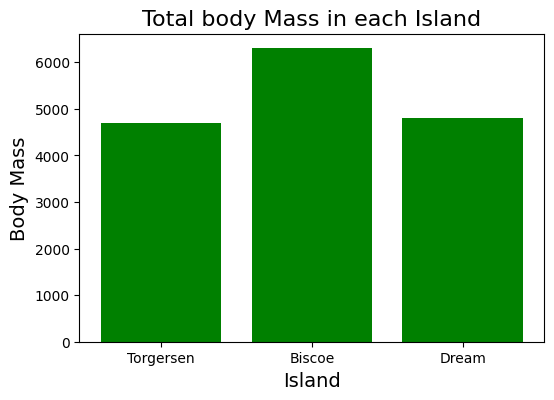

In [26]:
#Barplot

category = df['island']
values = df['body_mass_g']

plt.figure(figsize = (6,4))
plt.bar(category, values, color = 'green')
plt.xlabel('Island', size = 14)
plt.ylabel('Body Mass', size = 14)
plt.title('Total body Mass in each Island', size = 16)
plt.show()

Biscoe island contains the penguins with the largest total body mass

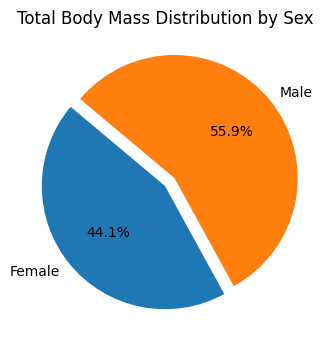

In [28]:
#Pie chart

body_mass_by_sex = df.groupby('sex')['body_mass_g'].sum()
explode = [0.1 if label == 'Male' else 0 for label in body_mass_by_sex.index]

plt.figure(figsize = (6,4))
plt.pie(body_mass_by_sex, labels=body_mass_by_sex.index, autopct='%1.1f%%', startangle=140, explode = explode)
plt.title('Total Body Mass Distribution by Sex')
plt.show()

More males have higher body mass than females

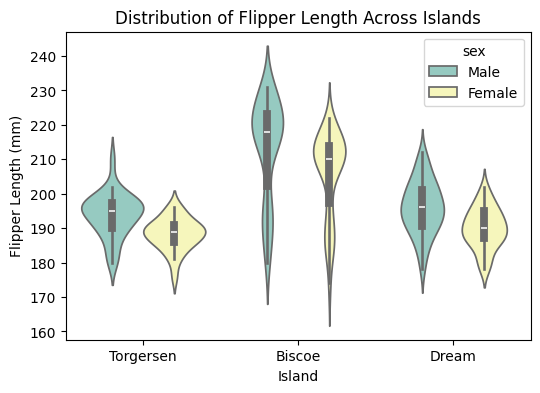

In [30]:
#violin plot

plt.figure(figsize=(6,4))
sns.violinplot(x="island", y="flipper_length_mm", data=df, palette="Set3", hue = 'sex')
plt.title("Distribution of Flipper Length Across Islands")
plt.xlabel("Island")
plt.ylabel("Flipper Length (mm)")
plt.show()

In each island, male penguins have the highest flipper length compared to females.

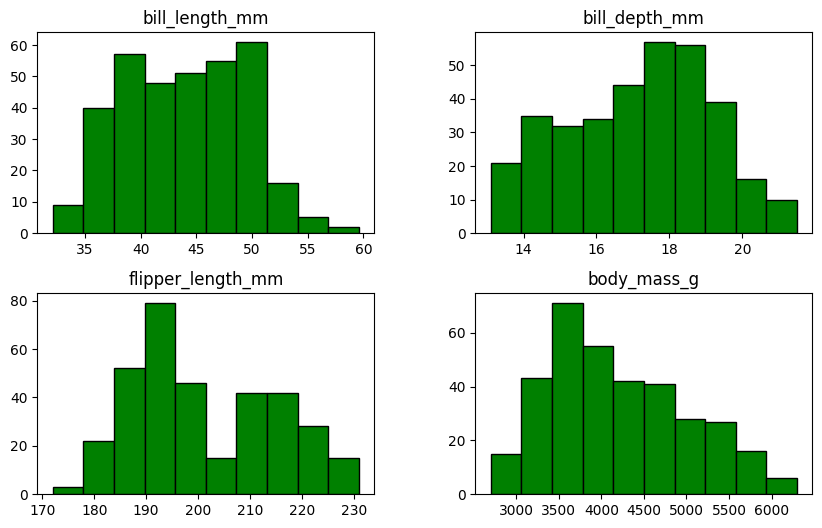

In [32]:
#Histogram

plt.rcParams['figure.figsize'] = (10,6)
df.hist(grid = False, edgecolor = 'black', color = 'green')
plt.show()

The figures show the distribution of values in each numerical column

<Figure size 1000x600 with 0 Axes>

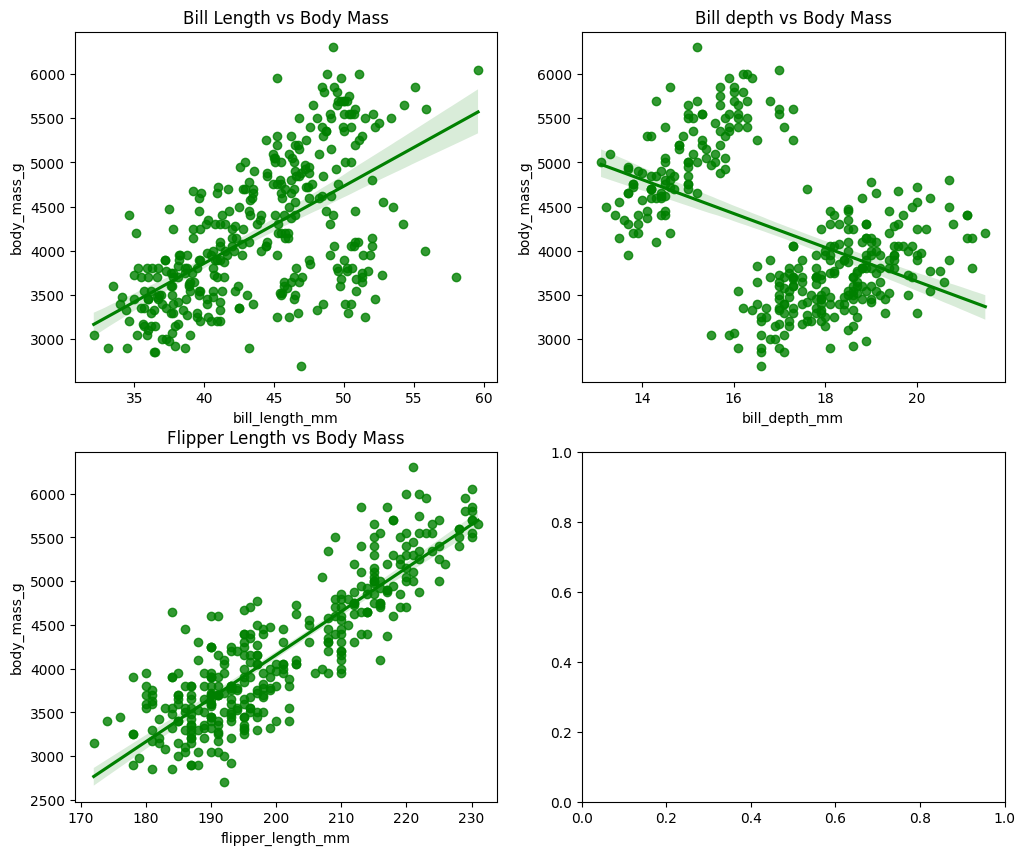

In [34]:
#regplots

plt.tight_layout()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(x = df['bill_length_mm'], y = df['body_mass_g'], ax=axes[0, 0], color = 'green')
axes[0, 0].set_title('Bill Length vs Body Mass')

sns.regplot(x = df['bill_depth_mm'], y = df['body_mass_g'], ax=axes[0, 1], color = 'green')
axes[0, 1].set_title('Bill depth vs Body Mass')

sns.regplot(x = df['flipper_length_mm'], y = df['body_mass_g'], ax=axes[1, 0], color = 'green')
axes[1, 0].set_title('Flipper Length vs Body Mass')

plt.show()

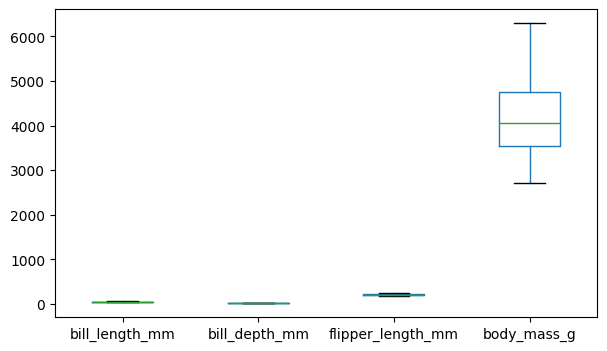

In [35]:
#Boxplot

plt.rcParams['figure.figsize'] = (7,4)
df.boxplot(grid = False)
plt.show()

All the numeric columns do not contain outliers

In [37]:
#Correlation matrix

numeric_columns = df[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
matrix = numeric_columns.corr()
matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235000,0.655858,0.594925
bill_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


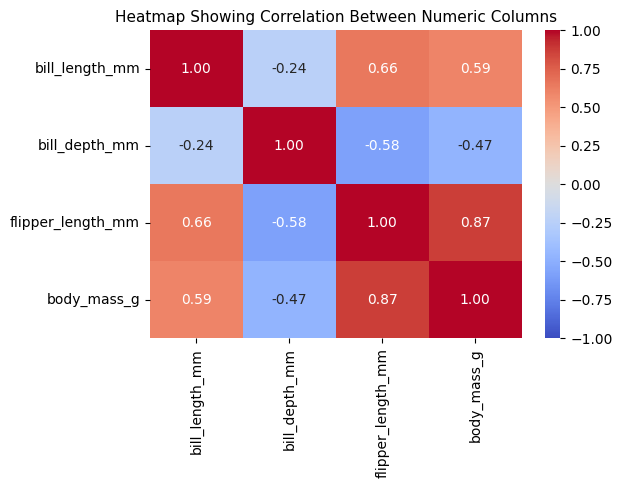

In [38]:
#Heatmap

plt.figure(figsize = (6,4))
plt.title('Heatmap Showing Correlation Between Numeric Columns', size = 11)
sns.heatmap(matrix, cmap = 'coolwarm', annot = True, vmin = -1, center = 0, vmax = 1, fmt = '.2f')
plt.show()

Flipper length has the strongest positive correlation with body mass (our target variable) at 0.87, and bill depth has the weakest correlation with body mass at -0.47

### Data Preprocessing

In [41]:
#Label Encoding

label_encoder = LabelEncoder()

df['species_encoded'] = label_encoder.fit_transform(df['species'])
df['island_encoded'] = label_encoder.fit_transform(df['island'])
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])


df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male,0,2,1
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female,0,2,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female,0,2,0
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,Male,0,2,1
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female,0,2,0


All columns are now in numeric form

In [43]:
#Checking the unique values assigned in each of the transformed columns

x = df['sex'].unique()
y = df['species'].unique()
z = df['island'].unique()

sex_category_mapping = {category: i for i, category in enumerate(x)}
species_category_mapping = {category: i for i, category in enumerate(y)}
island_category_mapping = {category: i for i, category in enumerate(z)}

print(sex_category_mapping)
print(species_category_mapping)
print(island_category_mapping)

{'Male': 0, 'Female': 1}
{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
{'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}


These are the assigned values in each of the three columns

In [45]:
#Standardizing bill_length_mm, bill_depth_mm, flipper_length_mm columns (Part of the feature columns)

scaler = StandardScaler()

df['bill_length_mm_scaled'] = scaler.fit_transform(df[['bill_length_mm']])
df['bill_depth_mm_scaled'] = scaler.fit_transform(df[['bill_depth_mm']])
df['flipper_length_mm_scaled'] = scaler.fit_transform(df[['flipper_length_mm']])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male,0,2,1,-0.887622,0.787289,-1.420541
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female,0,2,0,-0.814037,0.126114,-1.063485
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female,0,2,0,-0.666866,0.431272,-0.420786
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,Male,0,2,1,0.096581,0.075255,-0.277964
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female,0,2,0,-1.329133,1.092447,-0.563608


Part of the feature columns have now been scaled. This was done to avoid feature importance, where certain columns with larger values are given importance compared to the ones with smaller values

### Development and Evaluation of the Model 

In [48]:
#Feature engineering

X = df[['species_encoded', 'island_encoded', 'sex_encoded', 'bill_length_mm_scaled', 'bill_depth_mm_scaled','flipper_length_mm_scaled']]
y = df['body_mass_g']

In [49]:
#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
#Getting the Linear regression model

linear_model = LinearRegression()

#Fitting and Training the model

linear_model.fit(X_train, y_train)

#Making predictions

y_predict = linear_model.predict(X_test)

#Checking the accuracies of the model

MAE = mean_absolute_error(y_predict, y_test)
print('MAE: ', round(MAE, 2))
MSE = mean_squared_error(y_predict, y_test)
print('MSE: ', round(MSE, 2))
r2 = r2_score(y_predict, y_test)
print('R2: ', round(r2, 2))
RMSE = np.sqrt(MSE)
print('RMSE', round(RMSE, 2))

MAE:  278.25
MSE:  118866.32
R2:  0.75
RMSE 344.77


The linear regression model has an r2 score of 0.75

In [52]:
#Getting the Ridge regression model

ridge_model = Ridge(alpha = 1.0)

#Fitting and Training the model

ridge_model.fit(X_train, y_train)

#Making predictions

y_predict = ridge_model.predict(X_test)

#Checking the accuracies of the model

MAE = mean_absolute_error(y_predict, y_test)
print('MAE: ', round(MAE, 2))
MSE = mean_squared_error(y_predict, y_test)
print('MSE: ', round(MSE, 2))
r2 = r2_score(y_predict, y_test)
print('R2: ', round(r2, 2))
RMSE = np.sqrt(MSE)
print('RMSE', round(RMSE, 2))

MAE:  278.41
MSE:  119360.9
R2:  0.75
RMSE 345.49


The Ridge regression model has an r2 score of 0.75

In [54]:
#Getting the Lasso regression model

lasso_model = Lasso(alpha = 1.0)

#Fitting and Training the model

lasso_model.fit(X_train, y_train)

#Making predictions

y_predict = lasso_model.predict(X_test)

#Checking the accuracies of the model

MAE = mean_absolute_error(y_predict, y_test)
print('MAE: ', round(MAE, 2))
MSE = mean_squared_error(y_predict, y_test)
print('MSE: ', round(MSE, 2))
r2 = r2_score(y_predict, y_test)
print('R2: ', round(r2, 2))
RMSE = np.sqrt(MSE)
print('RMSE', round(RMSE, 2))

MAE:  278.33
MSE:  119364.97
R2:  0.75
RMSE 345.49


The Lasso regression model has an r2 score of 0.75

In [56]:
#Feature engineering without island

X = df[['species_encoded', 'sex_encoded', 'bill_length_mm_scaled', 'bill_depth_mm_scaled','flipper_length_mm_scaled']]
y = df['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Getting the Linear regression model

linear_model = LinearRegression()

#Fitting and Training the model

linear_model.fit(X_train, y_train)

#Making predictions

y_predict = linear_model.predict(X_test)

#Checking the accuracies of the model

MAE = mean_absolute_error(y_predict, y_test)
print('MAE: ', round(MAE, 2))
MSE = mean_squared_error(y_predict, y_test)
print('MSE: ', round(MSE, 2))
r2 = r2_score(y_predict, y_test)
print('R2: ', round(r2, 2))
RMSE = np.sqrt(MSE)
print('RMSE', round(RMSE, 2))

MAE:  285.12
MSE:  122525.1
R2:  0.74
RMSE 350.04


Without islands both MAE and r2 scores are lower than if it were included

In [58]:
#Feature engineering with physical attributes only

X = df[['bill_length_mm_scaled', 'bill_depth_mm_scaled','flipper_length_mm_scaled']]
y = df['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Getting the Linear regression model

linear_model = LinearRegression()

#Fitting and Training the model

linear_model.fit(X_train, y_train)

#Making predictions

y_predict = linear_model.predict(X_test)

#Checking the accuracies of the model

MAE = mean_absolute_error(y_predict, y_test)
print('MAE: ', round(MAE, 2))
MSE = mean_squared_error(y_predict, y_test)
print('MSE: ', round(MSE, 2))
r2 = r2_score(y_predict, y_test)
print('R2: ', round(r2, 2))
RMSE = np.sqrt(MSE)
print('RMSE', round(RMSE, 2))

MAE:  330.48
MSE:  176415.41
R2:  0.57
RMSE 420.02


It is even lower than the other two 

In [60]:
#Feature engineering with flipper length only

X = df[['flipper_length_mm_scaled']]
y = df['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Getting the Linear regression model

linear_model = LinearRegression()

#Fitting and Training the model

linear_model.fit(X_train, y_train)

#Making predictions

y_predict = linear_model.predict(X_test)

#Checking the accuracies of the model

MAE = mean_absolute_error(y_predict, y_test)
print('MAE: ', round(MAE, 2))
MSE = mean_squared_error(y_predict, y_test)
print('MSE: ', round(MSE, 2))
r2 = r2_score(y_predict, y_test)
print('R2: ', round(r2, 2))
RMSE = np.sqrt(MSE)
print('RMSE', round(RMSE, 2))

MAE:  334.22
MSE:  179716.6
R2:  0.56
RMSE 423.93


Using one Variable lowers the R2 score further

### Conclusion

- The highest scores were obtained when the model applied all the 6 features that were initially chosen, with a score of 0.75. Reducing the number of features made the r2 score (as well as the other metrics) to become lower. Therefore, all the 6 features are well suited to predict the body mass of the penguins. 